On June 7th, moved a bunch of code to shared repository. This notebook is to confirm that all that code was imported successfully and all works with each other

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sklearn
import os 
import sys
sys.path.insert(0, os.path.abspath('../Pipeline'))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import Run_Model as run_model

## Test Make_By_Officer_DF

In [3]:
t1 = (2012, 2014)
t2 = (2015, 2015)
additional_cont_col, final_df = make_officer_df.make_df(t1, t2)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (4,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [8]:
final_df.isna().sum()[50:70]

Use of Force - No Weapon                                    0
Use of Force - Weapon                                       0
Pcnt Complaints Against ASIAN/PACIFIC ISLANDER              0
Pcnt Complaints Against BLACK                               0
Pcnt Complaints Against HISPANIC                            0
Pcnt Complaints Against NATIVE AMERICAN/ALASKAN NATIVE      0
Pcnt Complaints Against WHITE                               0
count_sustained                                             0
suspension_length                                           0
UID                                                         0
start_date_timestamp                                       13
cleaned_rank                                                0
birth_year                                                  0
current_unit                                                0
average_salary                                            104
salary_change                                              45
race    

## Test Run_Model

In [6]:
cont_feat = ["birth_year", "start_date_timestamp","suspension_length","settlement", "count_sustained","trr_total", "trr_firearms_total",
             "trr_taser_total"]
cont_feat.extend(bin_names)
cat_feat = ["gender", "race", "cleaned_rank"]


In [7]:
desired_targets = ['target_use_of_force', 'target_drug', 'target_racial',
                   'target_sustained', 'target_nonviolent']
target_col = "any_known_complaint"
feat_engineering_helpers.make_target_col(final_df, desired_targets, target_col)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/skl

best  LogisticRegression  metrics:
{'precision': 0.5454545454545454, 'recall': 0.029556650246305417, 'f1-score': 0.05607476635514018, 'support': 203}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.141463,1.000000,0.500000
0.00001,0.142057,1.000000,0.502435
0.01000,0.142057,1.000000,0.502435
0.05000,0.143670,0.995074,0.508901
0.10000,0.167825,0.832512,0.576159
0.20000,0.248804,0.256158,0.564361
0.50000,0.545455,0.029557,0.512749
0.70000,0.333333,0.004926,0.501651
0.90000,0.000000,0.000000,0.500000


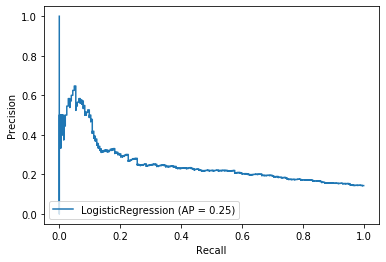

In [8]:
log, log_labels =  run_model.single_model(final_df, "LogisticRegression", 
                                          target_col, cont_feat, cat_feat, "balanced_accuracy")

In [9]:
log.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'